link kaggle notebook: https://www.kaggle.com/code/komangandika/givemecredit-komang

competition link: https://www.kaggle.com/competitions/GiveMeSomeCredit/overview

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


## Importing Data

In [2]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import xlrd
dictionary = pd.read_excel("/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls",header=1)
dictionary

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


As we can see from the data there is Data Dictionary on sheet 1 for the description of each variable or called Metadata. The sheet 2 and 3 are empty.

In [4]:
df = pd.read_csv("/kaggle/input/GiveMeSomeCredit/cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.shape

(150000, 12)

This is the training dataset, and we can identify our target variable, 'SeriousDlqin2yrs,' which contains values indicating that this dataset serves as the training data. We see 'Unnamed: 0' which is a pretty redundant with the existence of indexing, we'll deal with it in EDA.

In [6]:
df_test = pd.read_csv("/kaggle/input/GiveMeSomeCredit/cs-test.csv")
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
df_test.shape

(101503, 12)

This is the testing dataset, and we can indentify our target variable, 'SeriousDlqin2yrs,' which does not contain values indicating that this dataset serves as the testing data. We see 'Unnamed: 0' which is a pretty redundant with the existence of indexing, we'll deal with it in EDA.

In [8]:
sampleEn = pd.read_csv("/kaggle/input/GiveMeSomeCredit/sampleEntry.csv")
sampleEn.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


This is the format for submission to the contest

## Problem Understanding

In this competition, the goal is to create a credit scoring model that predicts the likelihood of an individual experiencing financial distress in the next two years. This model aims to empower borrowers to make informed financial decisions, as banks rely on credit scoring algorithms to determine loan eligibility.

## Exploratory Data Analysis (EDA)

We need to do data cleaning both in training and testing dataset

In [9]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


As evident in both the training and testing datasets, the 'Unnamed:0' column redundancy arises from the presence of pre-existing indexing in the dataset

In [11]:
# Dropping 'Unnamed: 0' from training and testing dataset
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [12]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [13]:
df_test.isna().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [14]:
percentage1 = (df['MonthlyIncome'].isna().sum()/len(df['MonthlyIncome']))*100
percentage2 = (df['NumberOfDependents'].isna().sum()/len(df['NumberOfDependents']))*100
percentage3 = (df_test['MonthlyIncome'].isna().sum()/len(df_test['MonthlyIncome']))*100
percentage4 = (df_test['NumberOfDependents'].isna().sum()/len(df_test['NumberOfDependents']))*100
print("The proportion of missing value in MonthlyIncome(Training):",percentage1,"%")
print("The proportion of missing value in NumberOfDependents(Training):",percentage2,"%")
print("\n")
print("The proportion of missing value in MonthlyIncome(Testing):",percentage3,"%")
print("The proportion of missing value in NumberOfDependents(Testing):",percentage4,"%")

The proportion of missing value in MonthlyIncome(Training): 19.820666666666668 %
The proportion of missing value in NumberOfDependents(Training): 2.616 %


The proportion of missing value in MonthlyIncome(Testing): 19.805325950957116 %
The proportion of missing value in NumberOfDependents(Testing): 2.5871156517541354 %


The proportion of missing value in 'NumberOfDependents' in each data is not that high but the 'MonthlyIncome' have a lot of missing values. But we can ignore it if we are using model that can handle missing value like XGBoost, but in this one i will impute the missing value.

For the missing value, we'll deal with it later in feature engineering, we need to visualize the data as it is.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

**RevolvingUtilizationOfUnsecuredLines**

In [16]:
print("Training")
print(df['RevolvingUtilizationOfUnsecuredLines'].describe())
print("\n")
print("Testing")
print(df_test['RevolvingUtilizationOfUnsecuredLines'].describe())

Training
count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


Testing
count    101503.000000
mean          5.310000
std         196.156039
min           0.000000
25%           0.030131
50%           0.152586
75%           0.564225
max       21821.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


There are some absurdly extreme value as we can see from the max compared to the mean value in bot testing and training.

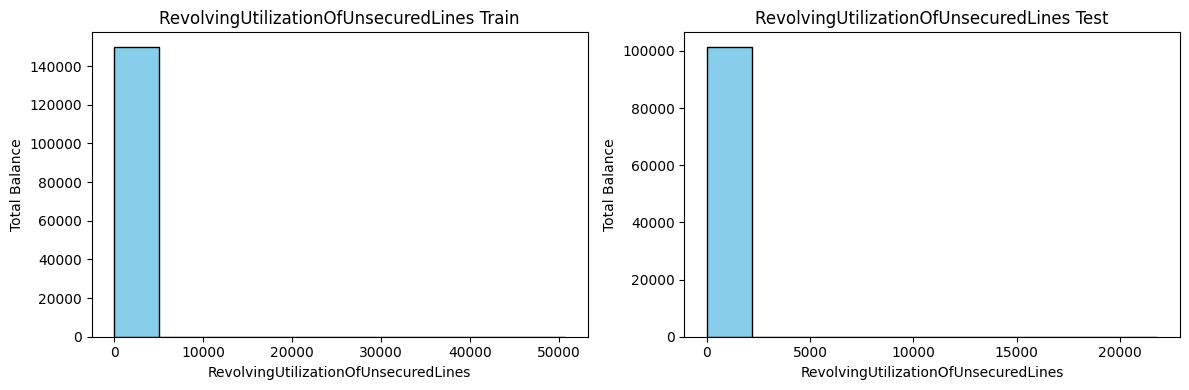

In [17]:
# RevolvingUtilizationOfUnsecuredLines
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(df['RevolvingUtilizationOfUnsecuredLines'], bins=10, color='skyblue', edgecolor='black')
ax1.set_title('RevolvingUtilizationOfUnsecuredLines Train')
ax1.set_xlabel('RevolvingUtilizationOfUnsecuredLines')
ax1.set_ylabel('Total Balance')

ax2.hist(df_test['RevolvingUtilizationOfUnsecuredLines'], bins=10, color='skyblue', edgecolor='black')
ax2.set_title('RevolvingUtilizationOfUnsecuredLines Test')
ax2.set_xlabel('RevolvingUtilizationOfUnsecuredLines')
ax2.set_ylabel('Total Balance')

plt.tight_layout()

plt.show()

**Age**

In [18]:
print("Training")
print(df['age'].describe())
print("\n")
print("Testing")
print(df_test['age'].describe())

Training
count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64


Testing
count    101503.000000
mean         52.405436
std          14.779756
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64


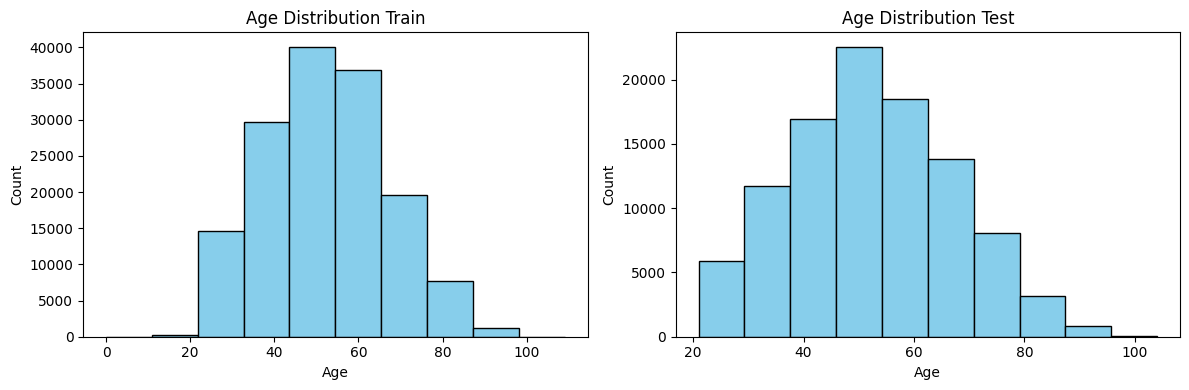

In [19]:
# Age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
ax1.set_title('Age Distribution Train')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

ax2.hist(df_test['age'], bins=10, color='skyblue', edgecolor='black')
ax2.set_title('Age Distribution Test')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

plt.tight_layout()

plt.show()

In [20]:
len(df[df['age'] == 0])

1

In the training dataset, there is an anomaly in the 'age' feature, where the minimum recorded age is 0. This anomaly is unusual since it's implausible for someone at the age of 0 to be eligible for a loan. But the missing value only accounts for one record, we can ignore it.

The plot seems to skewed a bit to the left on both, which means more younger people.

**MonthlyIncome**

In [21]:
print("Training")
print(df['MonthlyIncome'].describe())
print("\n")
print("Testing")
print(df_test['MonthlyIncome'].describe())

Training
count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64


Testing
count    8.140000e+04
mean     6.855036e+03
std      3.650860e+04
min      0.000000e+00
25%      3.408000e+03
50%      5.400000e+03
75%      8.200000e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64


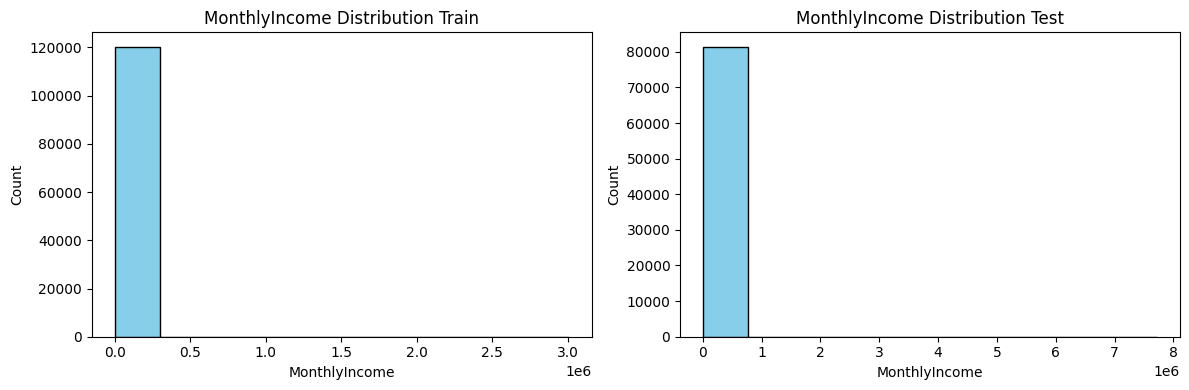

In [22]:
# MonthlyIncome
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(df['MonthlyIncome'], bins=10, color='skyblue', edgecolor='black')
ax1.set_title('MonthlyIncome Distribution Train')
ax1.set_xlabel('MonthlyIncome')
ax1.set_ylabel('Count')

ax2.hist(df_test['MonthlyIncome'], bins=10, color='skyblue', edgecolor='black')
ax2.set_title('MonthlyIncome Distribution Test')
ax2.set_xlabel('MonthlyIncome')
ax2.set_ylabel('Count')

plt.tight_layout()

plt.show()

As we can see, there is some absurd outlier too which is very far from the 75 percentile.

**NumberOfDependents**

In [23]:
print("Training")
print(df['NumberOfDependents'].describe())
print("\n")
print("Testing")
print(df_test['NumberOfDependents'].describe())

Training
count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64


Testing
count    98877.000000
mean         0.769046
std          1.136778
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         43.000000
Name: NumberOfDependents, dtype: float64


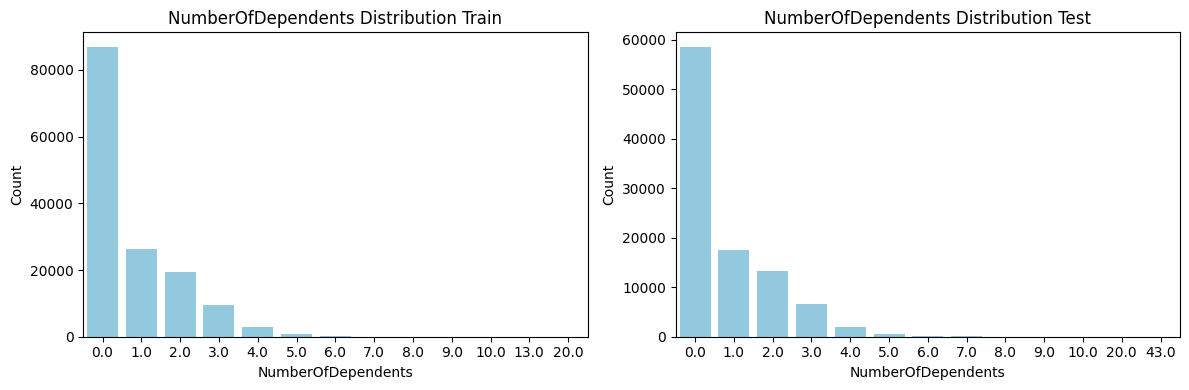

In [24]:
# NumberOfDependents
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x='NumberOfDependents', color='skyblue', ax=ax1)
ax1.set_title('NumberOfDependents Distribution Train')
ax1.set_xlabel('NumberOfDependents')
ax1.set_ylabel('Count')

# Count plot for test dataset
sns.countplot(data=df_test, x='NumberOfDependents', color='skyblue', ax=ax2)
ax2.set_title('NumberOfDependents Distribution Test')
ax2.set_xlabel('NumberOfDependents')
ax2.set_ylabel('Count')

plt.tight_layout()

plt.show()

As we can see most of the 'NumberOfDependents' value is 0 and reduce as it go to higher number.

<Axes: title={'center': 'Heatmap of Training Data'}>

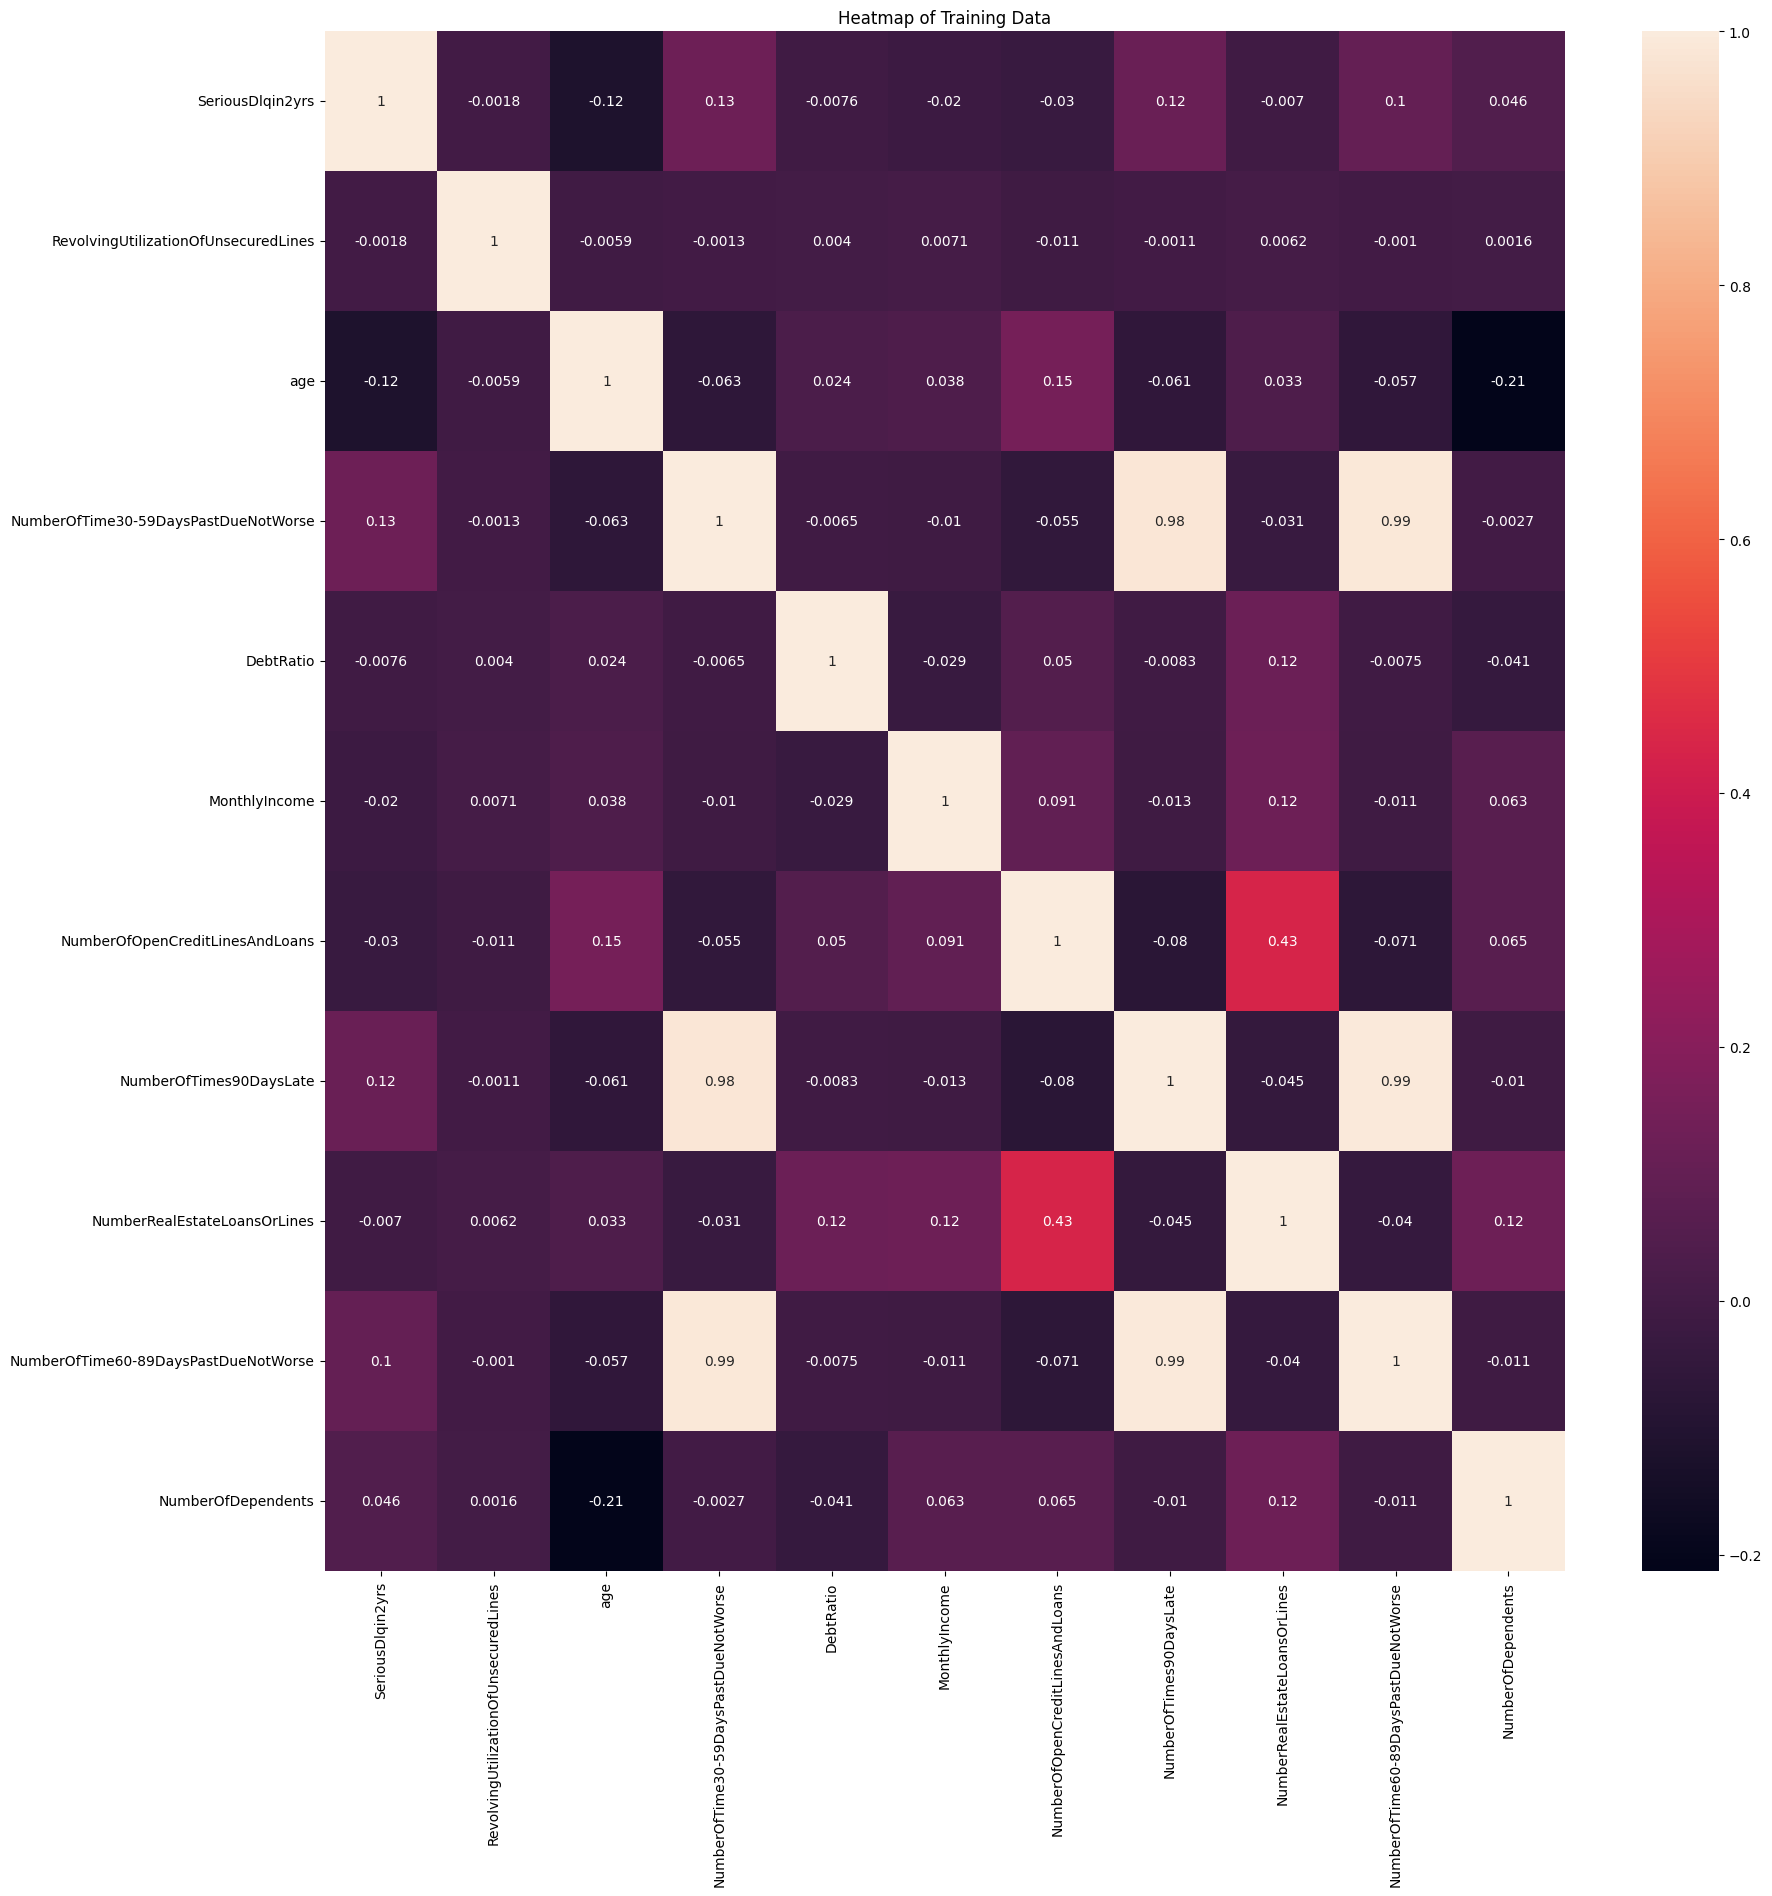

In [25]:
plt.figure(figsize=(20,20))
plt.title("Heatmap of Training Data")
churn_corr = df.corr()
churn_corr_top = churn_corr.index
sns.heatmap(df[churn_corr_top].corr(), annot=True)

<Axes: title={'center': 'Heatmap of Testing Data'}>

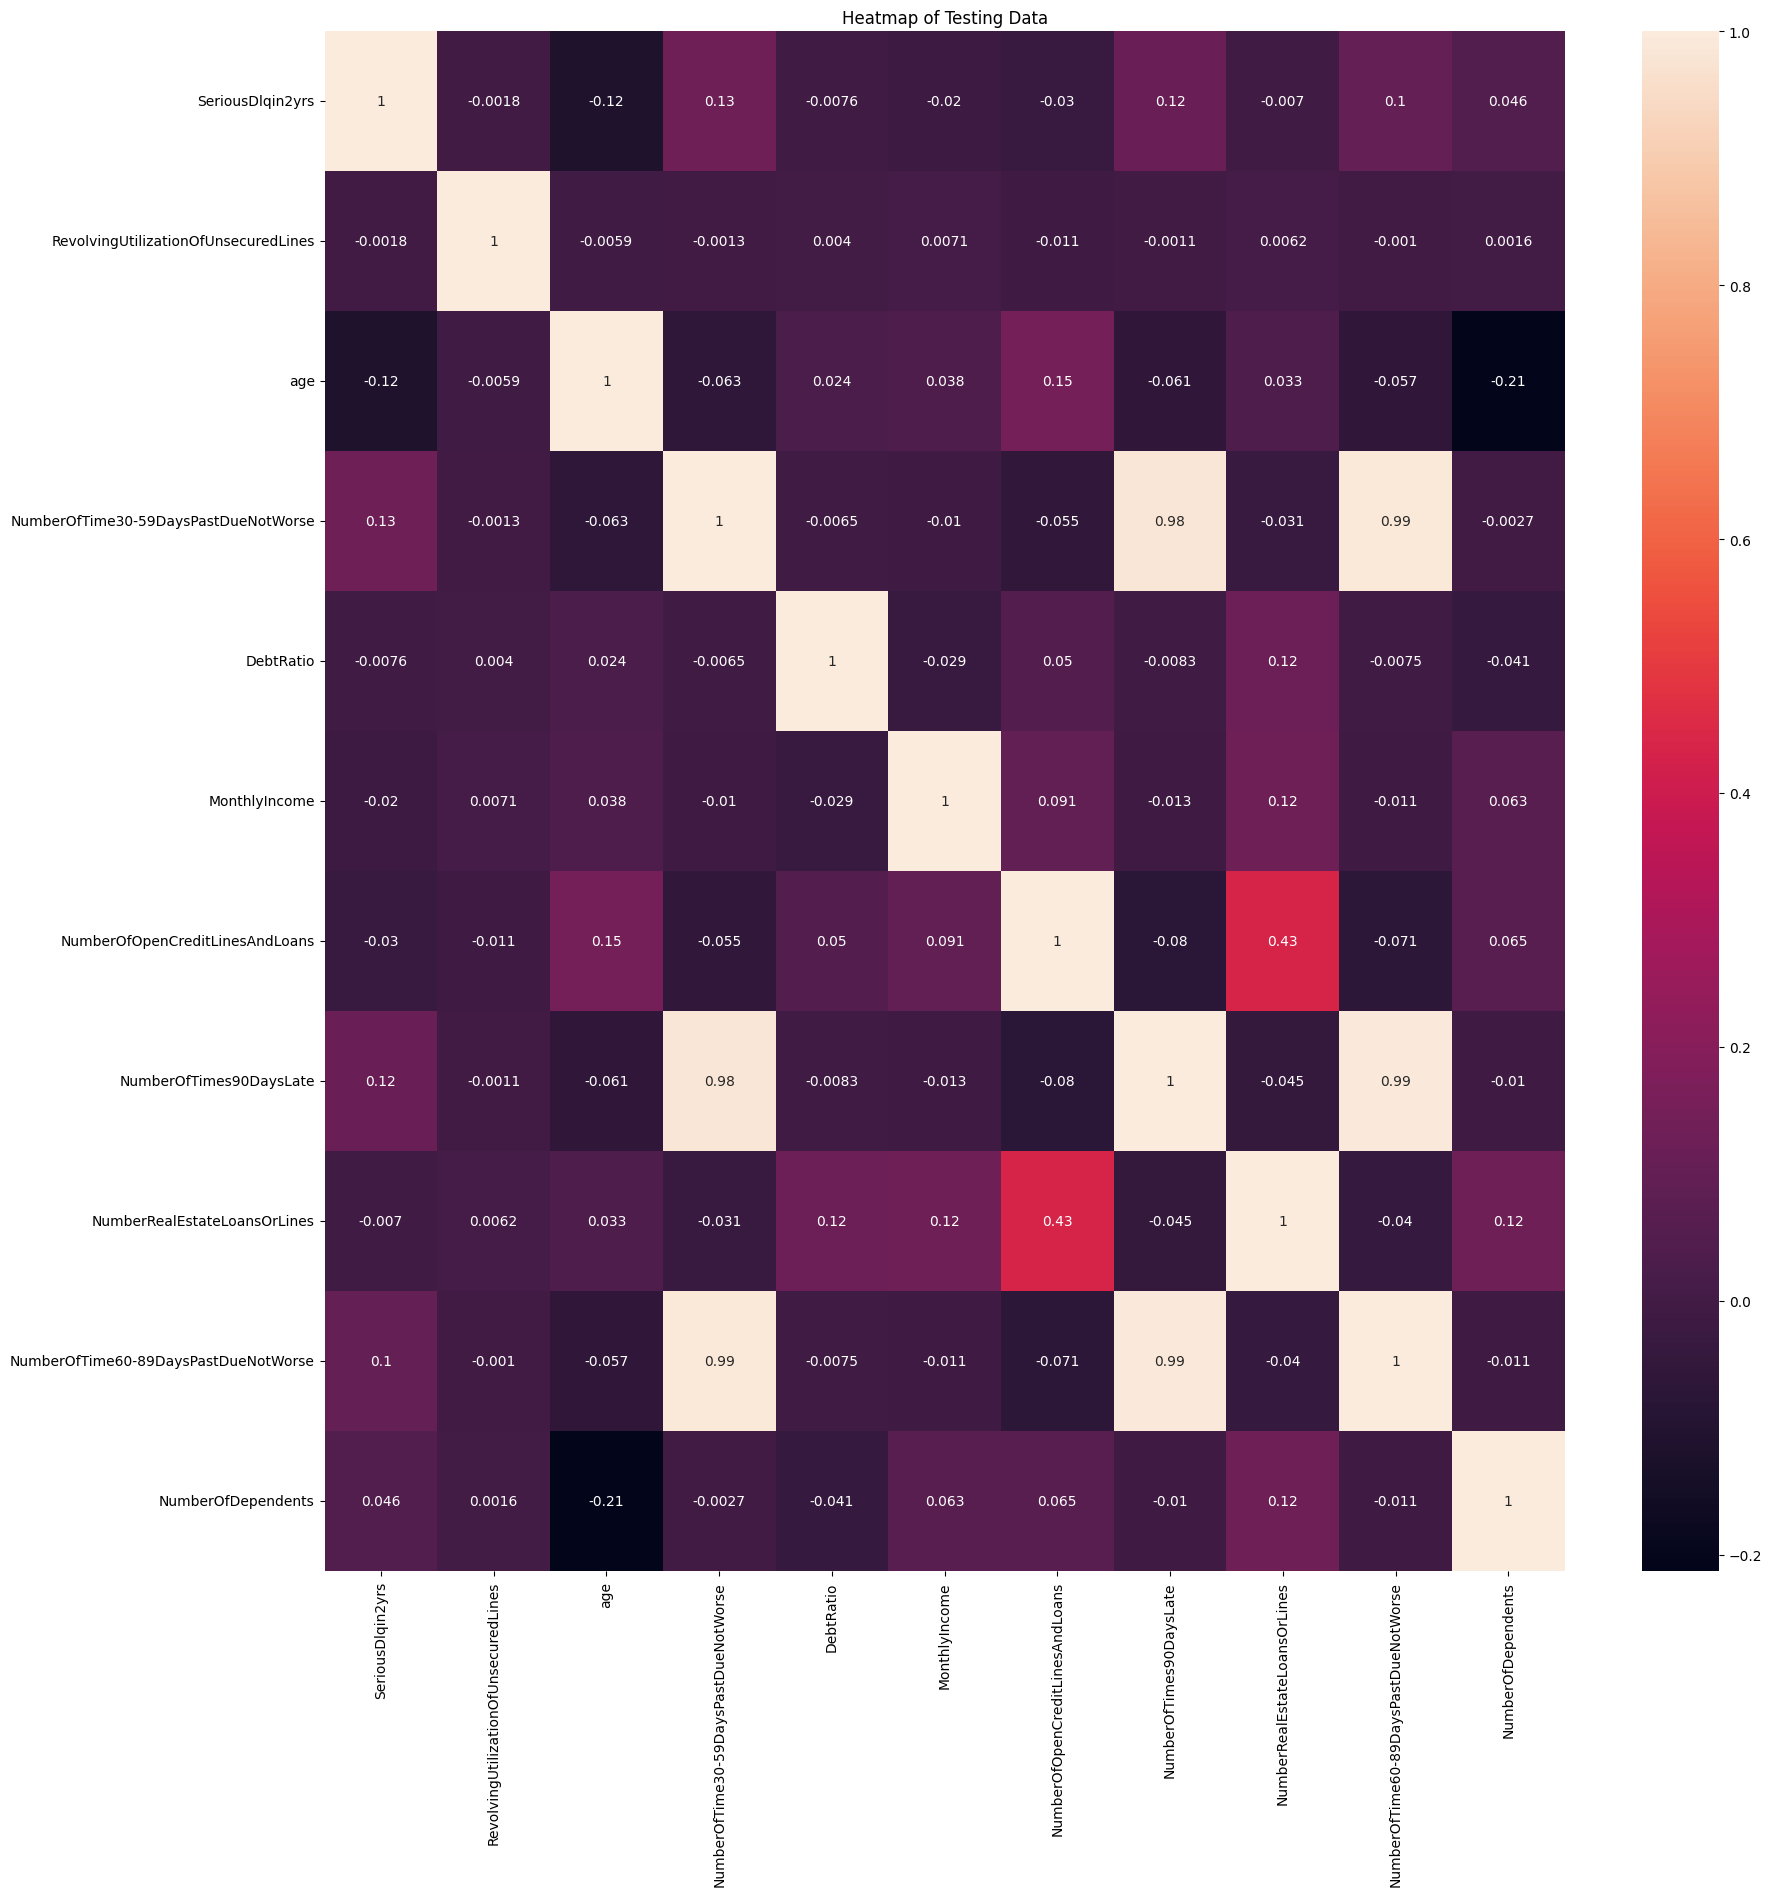

In [26]:
plt.figure(figsize=(20,20))
plt.title("Heatmap of Testing Data")
churn_corr = df_test.corr()
churn_corr_top = churn_corr.index
sns.heatmap(df[churn_corr_top].corr(), annot=True)

Both in Training and Testing dataset have a similar correlation with 'NumberOfTime30-59DaysPastDueNotWorse' and 'NumberOfTimes90DaysLate' with 0.98 correlation which is really high.

Both Training and Testing dataset have similar behavioral in the correlation to each of their variable.

## Class Imbalance

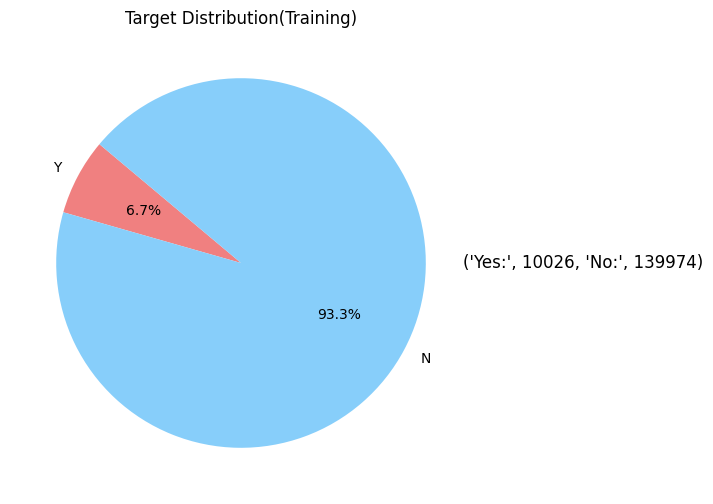

In [27]:
labels = ['Y', 'N']
sizes = [df['SeriousDlqin2yrs'].sum(), len(df) - df['SeriousDlqin2yrs'].sum()]

colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

Yes = df['SeriousDlqin2yrs'].sum()
No = len(df) - df['SeriousDlqin2yrs'].sum()
description = "Yes:",Yes,"No:",No
plt.text(1.2, 0, description, ha='left', va='center', fontsize=12)

plt.title('Target Distribution(Training)')
plt.show()

An observation from the training data reveals an imbalance in our target variable, 'SeriousDlqin2yrs,' where the majority class is 'No.' This imbalance could lead to model bias in favor of the dominant class, potentially resulting in a high accuracy score. However, while accuracy is valuable, it's not the sole objective. Our goal is to build a model capable of effectively classifying both 'Yes' and 'No' instances. To achieve this, we prioritize evaluation metrics like AUC ROC, Recall, Precision, and F1-Score, which offer a more comprehensive assessment of model performance.

### Missing Value

Imputing missing value, as we can see we have missing value on both train and test dataset, 'MonthlyIncome' can be impute with median because of the outlier which might make the mean not good fit.

For imputing the 'NumberOfDependents', I can impute it with its mode because it's a discrete variable(no fraction).

I can use more advance technique like regression, but for this one, I am using the mean for 'MonthlyIncome' and mode for 'NumerOfDependents'

In [28]:
#Imputing Train Data
mean_value_train = df['MonthlyIncome'].mean()
df['MonthlyIncome'].fillna(mean_value_train, inplace=True)
mode_value_train = df['NumberOfDependents'].mode().iloc[0]
df['NumberOfDependents'].fillna(mode_value_train, inplace=True)

In [29]:
#Imputing Test Data
mean_value_test = df_test['MonthlyIncome'].mean()
df_test['MonthlyIncome'].fillna(mean_value_test, inplace=True)
mode_value_test = df_test['NumberOfDependents'].mode().iloc[0]
df_test['NumberOfDependents'].fillna(mode_value_test, inplace=True)

In [30]:
print(df.isna().sum())
print(df_test.isna().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: i

### Outlier

I want to look at DebtRatio

In [31]:
print("Training")
print(df['DebtRatio'].describe())
print("\n")
print("Testing")
print(df_test['DebtRatio'].describe())

Training
count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64


Testing
count    101503.000000
mean        344.475020
std        1632.595231
min           0.000000
25%           0.173423
50%           0.364260
75%           0.851619
max      268326.000000
Name: DebtRatio, dtype: float64


In [32]:
#Train with 3 standard deviation
mean = np.mean(df['DebtRatio'])
std = np.std(df['DebtRatio'])
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
outliers = [x for x in df['DebtRatio'] if x < lower_bound or x > upper_bound]
num_outliers = len(outliers)
num_outliers

659

In [33]:
#Test with 3 standard deviation
mean = np.mean(df_test['DebtRatio'])
std = np.std(df_test['DebtRatio'])
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
outliers = [x for x in df_test['DebtRatio'] if x < lower_bound or x > upper_bound]
num_outliers = len(outliers)
num_outliers

873

By using Z-Score method We can see there are some outliers not that much, to handle this problem I will scale all the variable before model to minimize the impact of the outliers.

### Scaling

In [34]:
 from sklearn.preprocessing import MinMaxScaler

In [35]:
columns_to_scale = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [36]:
#Before Scaling
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [37]:
df_test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,1.015030e+05,101503.000000,101503.000000,101503.000000,101503.000000,101503.00000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.74915
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.269395e+04,5.144100,4.515859,1.110253,4.503578,1.12860
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.00000
50%,NaN,0.152586,52.000000,0.000000,0.364260,6.583000e+03,8.000000,0.000000,1.000000,0.000000,0.00000
75%,NaN,0.564225,63.000000,0.000000,0.851619,7.374000e+03,11.000000,0.000000,2.000000,0.000000,1.00000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.00000


In [38]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_data_test = scaler.fit_transform(df_test[columns_to_scale])
scaled_df_test = pd.DataFrame(scaled_data_test, columns=columns_to_scale)

In [39]:
#After Scaling
scaled_df.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1.500000e+05,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,1.192798e-04,0.479773,0.004296,1.070803e-03,0.002217,0.145737,0.002714,0.018856,0.002453,0.036871
std,4.925364e-03,0.135522,0.042783,6.181502e-03,0.004281,0.088723,0.042544,0.020922,0.042400,0.055351
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.890085e-07,0.376147,0.000000,5.310675e-07,0.001297,0.086207,0.000000,0.000000,0.000000,0.000000
50%,3.040560e-06,0.477064,0.000000,1.111762e-06,0.002194,0.137931,0.000000,0.018519,0.000000,0.000000
75%,1.102481e-05,0.577982,0.000000,2.633754e-06,0.002459,0.189655,0.000000,0.037037,0.000000,0.050000
max,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
scaled_df_test.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,101503.000000,101503.000000,1.015030e+05,101503.000000,101503.000000,101503.000000,101503.000000,101503.000000,101503.000000
mean,0.000243,0.378379,0.004630,1.283793e-03,0.000887,0.099453,0.003027,0.027380,0.002758,0.017422
std,0.008989,0.178069,0.046311,6.084372e-03,0.004231,0.060519,0.046080,0.030007,0.045955,0.026247
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000001,0.240964,0.000000,6.463164e-07,0.000505,0.058824,0.000000,0.000000,0.000000,0.000000
50%,0.000007,0.373494,0.000000,1.357527e-06,0.000852,0.094118,0.000000,0.027027,0.000000,0.000000
75%,0.000026,0.506024,0.000000,3.173823e-06,0.000954,0.129412,0.000000,0.054054,0.000000,0.023256
max,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting Dataset

In [41]:
X = scaled_df.copy()
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.000015,0.412844,0.020408,2.435759e-06,0.003031,0.224138,0.000000,0.111111,0.0,0.10
1,0.000019,0.366972,0.000000,3.696982e-07,0.000864,0.068966,0.000000,0.000000,0.0,0.05
2,0.000013,0.348624,0.010204,2.581822e-07,0.001011,0.034483,0.010204,0.000000,0.0,0.00
3,0.000005,0.275229,0.000000,1.093528e-07,0.001097,0.086207,0.000000,0.000000,0.0,0.00
4,0.000018,0.449541,0.010204,7.560939e-08,0.021134,0.120690,0.000000,0.018519,0.0,0.00


In [42]:
y = df['SeriousDlqin2yrs'].copy()
y.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [43]:
sum(y)/len(y)

0.06684

As we can see again the target is imbalance to handle it I am using stratify

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=777,stratify=y)

In [46]:
sum(y_train)/len(y_train)

0.06684166666666666

In [47]:
sum(y_test)/len(y_test)

0.06683333333333333

Both of the training and testing(eval) is now with the same ratio.

## Model

### Base Model

The reason i use XGBoost is because it is robust and easy to use

In [48]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 4,
    'subsample': 0.5,
    'booster':'gbtree',
    'colsample_bytree': 0.5,
    'seed':777
}

In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Training the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

In [50]:
# Making predictions on the test set
y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]

In [51]:
# Evaluation
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc = np.round(roc_auc_score(y_test, predictions), 3)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Accuracy: 0.94
Precision: 0.61
Recall: 0.19
F1-Score: 0.29
AUC: 0.59


## Model Improvement

I am using RandomizedSearchCV to tune the parameter of my XGBoost Model

In [52]:
params_improv={
    "max_depth": [5, 6, 8, 10, 12],
    "learning_rate": [0.5, 0.1, 0.01, 0.001],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
xgb_init = xgb.XGBClassifier()

In [55]:
random_cv = RandomizedSearchCV(xgb_init, param_distributions=params_improv, n_iter=5, scoring="roc_auc", n_jobs=1, cv=5, verbose=3)

In [56]:
random_cv.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.860 total time=   6.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.860 total time=   6.7s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.860 total time=   6.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.862 total time=   7.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.866 total time=   6.8s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.001, max_depth=10, min_child_weight=5;, score=0.862 total time=   5.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.001, max_depth=10, min_child_weight=5;, score=0.860 total time=   5.4s
[CV 3/5] END colsam

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.5, 0.1, 0.01,
                                                          0.001],
                                        'max_depth': [5, 6, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [57]:
random_cv.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.001,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

## Final XGBoost Model

In [58]:
params = {
 'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'booster': 'gbtree',
 'eta' : 0.1,
 'min_child_weight': 2,
 'max_depth': 10,
 'learning_rate': 0.005,
 'gamma': 0.4,
 'colsample_bytree': 0.7,
 'random_state':0,
 'reg_alpha':0,
 'reg_lambda':0,
 'subsample':0.6,
}

In [59]:
# Training the XGBoost model
dtrain1 = xgb.DMatrix(X_train, label=y_train)
dtest1 = xgb.DMatrix(X_test, label=y_test)

num_rounds = 100
model = xgb.train(params, dtrain1, num_rounds)

In [60]:
# Making predictions on the test set
y_pred = model.predict(dtest1)
predictions = [round(value) for value in y_pred]

In [61]:
# Evaluation
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc = np.round(roc_auc_score(y_test, predictions), 3)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Accuracy: 0.94
Precision: 0.64
Recall: 0.12
F1-Score: 0.20
AUC: 0.56


After doing RandomSearchCV, there is not that much improvement.

In [62]:
col_input = scaled_df_test
dtest_inputs = xgb.DMatrix(col_input)
probs=model.predict(dtest_inputs)
probs

array([0.3709507 , 0.3904666 , 0.3165957 , ..., 0.31051287, 0.4117901 ,
       0.37461814], dtype=float32)

In [63]:
sampleEn['Probability'] = probs.tolist() 
sampleEn

,Id,Probability
0,1,0.370951
1,2,0.390467
2,3,0.316596
3,4,0.373084
4,5,0.364910
...,...,...
101498,101499,0.325472
101499,101500,0.456091
101500,101501,0.310513
101501,101502,0.411790


In [64]:
sampleEn.to_csv('/kaggle/working/submission_Komang.csv',index=False)